# Constants

In [1]:
WORK_DIR_PATH = "c:/Users/jayar/Desktop/바탕 화면/DEGREE/RESEARCH-MLP/"

# Split
FILTER_BY = "user"
TRN_VAL_TST_RATIO = [0.8, 0.1, 0.1]
NEG_PER_POS = [1, 1, 100, 100]
BATCH_SIZE = [128, 128, 32, 1]

# Model
N_FACTORS = 32
HIDDEN = [N_FACTORS*4, N_FACTORS*2, N_FACTORS]
DROPOUT = 0.2
MODEL_NAME = "VER_1_1.1.1"

# How to Learn
LEARNING_RATE = 1e-4
LAMBDA_ = 1e-2

# Fit
N_EPOCHS = 100

# Config

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
os.chdir(WORK_DIR_PATH)
print(f"DIRECTORY: {os.getcwd()}")

DIRECTORY: c:\Users\jayar\Desktop\바탕 화면\DEGREE\RESEARCH-MLP


In [3]:
import pandas as pd
import torch

In [4]:
from models import NeuMF
from MYUTILS import (
    msr,
    ranking,
    et_cetera,
)
from MYUTILS.config.constants import (
    DEFAULT_USER_COL,
    DEFAULT_ITEM_COL,
    DEFAULT_RATING_COL,
    DEFAULT_LABEL_COL,
    DEFAULT_TIMESTAMP_COL,
    DEFAULT_PREDICTION_COL,
    DEFAULT_K,
    SEED,
)

In [5]:
# Seed
et_cetera.seed.reset(SEED)

SETTING ALL SEEDS TO 42...
ALL SEEDS SET


In [6]:
# Available GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Data Preparation

In [7]:
# Upload Data
DATA_NAME = "ml-100k"
DATA_PATH = f"./data/{DATA_NAME}.csv"
data = pd.read_csv(DATA_PATH)

In [8]:
# Columns
COL_LIST = ['userId', 'movieId', 'rating', 'timestamp']

RE_COL_LIST = [
    DEFAULT_USER_COL,
    DEFAULT_ITEM_COL,
    DEFAULT_RATING_COL,
    DEFAULT_TIMESTAMP_COL,
]

RENAMES = dict(zip(COL_LIST, RE_COL_LIST))

data = data[COL_LIST]
data = data.rename(columns=RENAMES)


# Label encoding
kwargs = dict(
    data=data, 
    col_user=DEFAULT_USER_COL, 
    col_item=DEFAULT_ITEM_COL,
)

data, user_label, item_label = et_cetera.data.label_encoding(**kwargs)


# Number of user, item
N_USERS = data[DEFAULT_USER_COL].nunique()
N_ITEMS = data[DEFAULT_ITEM_COL].nunique()


# Select quartile users
LOW_USER, HIGH_USER = et_cetera.data.user_interaction_quantile(data)

In [9]:
# data Description
et_cetera.data.description(data)

number of user: 610
number of item: 9724
total interaction: 100836
mean interaction of user: 165
mean interaction of item: 10
interaction density: 1.7000 %


In [10]:
kwargs = dict(
    data=data,
    n_users=N_USERS,
    n_items=N_ITEMS,
    col_user=DEFAULT_USER_COL,
    col_item=DEFAULT_ITEM_COL,
)

dataloader = ranking.trn_val_tst.Module(**kwargs)

kwargs = dict(
    filter_by=FILTER_BY,
    trn_val_tst_ratio=TRN_VAL_TST_RATIO,
    neg_per_pos=NEG_PER_POS,
    batch_size=BATCH_SIZE,
    seed=SEED,
    )

(trn_loader, val_loader, tst_loader, loo_loader), trn_pos_per_user = dataloader.get(**kwargs)

# Modeling

In [11]:
kwargs = dict(
    n_users=N_USERS,
    n_items=N_ITEMS,
    n_factors=N_FACTORS,
    hidden=HIDDEN,
    dropout=DROPOUT,
    model_name=MODEL_NAME,
)

model = NeuMF.MODEL.Module(**kwargs)

In [12]:
kwargs = dict(
    model=model,
    lr=LEARNING_RATE,
    lambda_=LAMBDA_,
)

loop = NeuMF.LOOP.Module(**kwargs)

# Train

In [13]:
kwargs = dict(
    trn_loader=trn_loader,
    val_loader=val_loader,
    n_epochs=N_EPOCHS,
)

history = loop.fit(**kwargs)

EPOCH 1 START ---->>>>


Epoch 1/100 TRN: 100%|██████████| 627/627 [00:02<00:00, 213.64it/s]


TRN TASK LOSS: 0.7124


Epoch 1/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 761.03it/s]


VAL TASK LOSS: 0.7010


Epoch 2/100 TRN: 100%|██████████| 627/627 [00:02<00:00, 220.47it/s]


TRN TASK LOSS: 0.6961


Epoch 2/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 683.50it/s]


VAL TASK LOSS: 0.6887


Epoch 3/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 177.13it/s]


TRN TASK LOSS: 0.6857


Epoch 3/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 552.59it/s]


VAL TASK LOSS: 0.6780


Epoch 4/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 180.91it/s]


TRN TASK LOSS: 0.6753


Epoch 4/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 614.61it/s]


VAL TASK LOSS: 0.6645


Epoch 5/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 173.12it/s]


TRN TASK LOSS: 0.6627


Epoch 5/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 487.41it/s]


VAL TASK LOSS: 0.6481


Epoch 6/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 156.06it/s]


TRN TASK LOSS: 0.6464


Epoch 6/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 501.94it/s]


VAL TASK LOSS: 0.6290


Epoch 7/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 135.56it/s]


TRN TASK LOSS: 0.6273


Epoch 7/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 492.68it/s]


VAL TASK LOSS: 0.6028


Epoch 8/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 148.12it/s]


TRN TASK LOSS: 0.6083


Epoch 8/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 530.66it/s]


VAL TASK LOSS: 0.5758


Epoch 9/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 169.47it/s]


TRN TASK LOSS: 0.5899


Epoch 9/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 529.45it/s]


VAL TASK LOSS: 0.5558


Epoch 10/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 160.84it/s]


TRN TASK LOSS: 0.5754


Epoch 10/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 519.36it/s]


VAL TASK LOSS: 0.5411
EPOCH 11 START ---->>>>


Epoch 11/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 139.72it/s]


TRN TASK LOSS: 0.5644


Epoch 11/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 508.55it/s]


VAL TASK LOSS: 0.5287


Epoch 12/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 140.26it/s]


TRN TASK LOSS: 0.5552


Epoch 12/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 484.64it/s]


VAL TASK LOSS: 0.5169


Epoch 13/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 152.31it/s]


TRN TASK LOSS: 0.5512


Epoch 13/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 526.56it/s]


VAL TASK LOSS: 0.5118


Epoch 14/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 156.59it/s]


TRN TASK LOSS: 0.5402


Epoch 14/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 528.44it/s]


VAL TASK LOSS: 0.5028


Epoch 15/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 145.01it/s]


TRN TASK LOSS: 0.5373


Epoch 15/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 498.83it/s]


VAL TASK LOSS: 0.4957


Epoch 16/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 151.03it/s]


TRN TASK LOSS: 0.5291


Epoch 16/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 510.84it/s]


VAL TASK LOSS: 0.4862


Epoch 17/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 162.12it/s]


TRN TASK LOSS: 0.5235


Epoch 17/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 498.92it/s]


VAL TASK LOSS: 0.4872


Epoch 18/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 160.68it/s]


TRN TASK LOSS: 0.5210


Epoch 18/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 505.23it/s]


VAL TASK LOSS: 0.4832


Epoch 19/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 148.88it/s]


TRN TASK LOSS: 0.5176


Epoch 19/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 486.76it/s]


VAL TASK LOSS: 0.4677


Epoch 20/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 136.47it/s]


TRN TASK LOSS: 0.5128


Epoch 20/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 508.73it/s]


VAL TASK LOSS: 0.4678
EPOCH 21 START ---->>>>


Epoch 21/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 145.82it/s]


TRN TASK LOSS: 0.5048


Epoch 21/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 503.58it/s]


VAL TASK LOSS: 0.4633


Epoch 22/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 169.03it/s]


TRN TASK LOSS: 0.5006


Epoch 22/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 533.52it/s]


VAL TASK LOSS: 0.4558


Epoch 23/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 144.81it/s]


TRN TASK LOSS: 0.4957


Epoch 23/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 508.69it/s]


VAL TASK LOSS: 0.4546


Epoch 24/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 144.32it/s]


TRN TASK LOSS: 0.4871


Epoch 24/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 435.73it/s]


VAL TASK LOSS: 0.4446


Epoch 25/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 151.01it/s]


TRN TASK LOSS: 0.4797


Epoch 25/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 479.97it/s]


VAL TASK LOSS: 0.4420


Epoch 26/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 153.56it/s]


TRN TASK LOSS: 0.4762


Epoch 26/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 498.85it/s]


VAL TASK LOSS: 0.4347


Epoch 27/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 149.39it/s]


TRN TASK LOSS: 0.4646


Epoch 27/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 517.35it/s]


VAL TASK LOSS: 0.4296


Epoch 28/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 152.11it/s]


TRN TASK LOSS: 0.4600


Epoch 28/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 510.33it/s]


VAL TASK LOSS: 0.4212


Epoch 29/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 144.30it/s]


TRN TASK LOSS: 0.4515


Epoch 29/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 502.75it/s]


VAL TASK LOSS: 0.4143


Epoch 30/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 142.91it/s]


TRN TASK LOSS: 0.4441


Epoch 30/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 513.76it/s]


VAL TASK LOSS: 0.4071
EPOCH 31 START ---->>>>


Epoch 31/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 141.44it/s]


TRN TASK LOSS: 0.4338


Epoch 31/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 474.54it/s]


VAL TASK LOSS: 0.3995


Epoch 32/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 142.45it/s]


TRN TASK LOSS: 0.4262


Epoch 32/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 469.32it/s]


VAL TASK LOSS: 0.3902


Epoch 33/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 144.80it/s]


TRN TASK LOSS: 0.4147


Epoch 33/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 526.66it/s]


VAL TASK LOSS: 0.3849


Epoch 34/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 157.93it/s]


TRN TASK LOSS: 0.4078


Epoch 34/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 482.33it/s]


VAL TASK LOSS: 0.3774


Epoch 35/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 147.53it/s]


TRN TASK LOSS: 0.3981


Epoch 35/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 516.13it/s]


VAL TASK LOSS: 0.3700


Epoch 36/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 148.94it/s]


TRN TASK LOSS: 0.3911


Epoch 36/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 465.84it/s]


VAL TASK LOSS: 0.3658


Epoch 37/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 149.31it/s]


TRN TASK LOSS: 0.3805


Epoch 37/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 490.44it/s]


VAL TASK LOSS: 0.3612


Epoch 38/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 155.24it/s]


TRN TASK LOSS: 0.3731


Epoch 38/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 528.14it/s]


VAL TASK LOSS: 0.3657


Epoch 39/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 149.29it/s]


TRN TASK LOSS: 0.3666


Epoch 39/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 533.76it/s]


VAL TASK LOSS: 0.3503


Epoch 40/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 148.10it/s]


TRN TASK LOSS: 0.3586


Epoch 40/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 522.25it/s]


VAL TASK LOSS: 0.3522
EPOCH 41 START ---->>>>


Epoch 41/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 153.62it/s]


TRN TASK LOSS: 0.3528


Epoch 41/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 471.43it/s]


VAL TASK LOSS: 0.3515


Epoch 42/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 159.30it/s]


TRN TASK LOSS: 0.3458


Epoch 42/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 460.84it/s]


VAL TASK LOSS: 0.3468


Epoch 43/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 152.77it/s]


TRN TASK LOSS: 0.3423


Epoch 43/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 519.22it/s]


VAL TASK LOSS: 0.3478


Epoch 44/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 150.18it/s]


TRN TASK LOSS: 0.3313


Epoch 44/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 470.76it/s]


VAL TASK LOSS: 0.3350


Epoch 45/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 137.26it/s]


TRN TASK LOSS: 0.3236


Epoch 45/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 482.63it/s]


VAL TASK LOSS: 0.3383


Epoch 46/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 136.79it/s]


TRN TASK LOSS: 0.3137


Epoch 46/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 593.31it/s]


VAL TASK LOSS: 0.3308


Epoch 47/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 167.16it/s]


TRN TASK LOSS: 0.3028


Epoch 47/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 532.21it/s]


VAL TASK LOSS: 0.3232


Epoch 48/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 157.44it/s]


TRN TASK LOSS: 0.2891


Epoch 48/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 597.43it/s]


VAL TASK LOSS: 0.3122


Epoch 49/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 155.25it/s]


TRN TASK LOSS: 0.2764


Epoch 49/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 601.84it/s]


VAL TASK LOSS: 0.3084


Epoch 50/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 148.58it/s]


TRN TASK LOSS: 0.2653


Epoch 50/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 527.86it/s]


VAL TASK LOSS: 0.3053
EPOCH 51 START ---->>>>


Epoch 51/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 146.96it/s]


TRN TASK LOSS: 0.2507


Epoch 51/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 526.68it/s]


VAL TASK LOSS: 0.3006


Epoch 52/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 145.14it/s]


TRN TASK LOSS: 0.2405


Epoch 52/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 546.66it/s]


VAL TASK LOSS: 0.2979


Epoch 53/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 149.29it/s]


TRN TASK LOSS: 0.2338


Epoch 53/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 515.42it/s]


VAL TASK LOSS: 0.2930


Epoch 54/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 150.04it/s]


TRN TASK LOSS: 0.2194


Epoch 54/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 473.05it/s]


VAL TASK LOSS: 0.2888


Epoch 55/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 152.98it/s]


TRN TASK LOSS: 0.2122


Epoch 55/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 474.75it/s]


VAL TASK LOSS: 0.3002


Epoch 56/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 156.98it/s]


TRN TASK LOSS: 0.2027


Epoch 56/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 515.52it/s]


VAL TASK LOSS: 0.2879


Epoch 57/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 154.09it/s]


TRN TASK LOSS: 0.1947


Epoch 57/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 534.97it/s]


VAL TASK LOSS: 0.2831


Epoch 58/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 159.35it/s]


TRN TASK LOSS: 0.1895


Epoch 58/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 528.59it/s]


VAL TASK LOSS: 0.2848


Epoch 59/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 159.75it/s]


TRN TASK LOSS: 0.1855


Epoch 59/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 505.27it/s]


VAL TASK LOSS: 0.2787


Epoch 60/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 145.81it/s]


TRN TASK LOSS: 0.1776


Epoch 60/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 526.03it/s]


VAL TASK LOSS: 0.2784
EPOCH 61 START ---->>>>


Epoch 61/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 148.68it/s]


TRN TASK LOSS: 0.1696


Epoch 61/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 532.13it/s]


VAL TASK LOSS: 0.2840


Epoch 62/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 152.35it/s]


TRN TASK LOSS: 0.1700


Epoch 62/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 592.10it/s]


VAL TASK LOSS: 0.2732


Epoch 63/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 151.42it/s]


TRN TASK LOSS: 0.1630


Epoch 63/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 558.49it/s]


VAL TASK LOSS: 0.2773


Epoch 64/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 146.86it/s]


TRN TASK LOSS: 0.1571


Epoch 64/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 517.84it/s]


VAL TASK LOSS: 0.2686


Epoch 65/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 143.77it/s]


TRN TASK LOSS: 0.1562


Epoch 65/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 526.49it/s]


VAL TASK LOSS: 0.2821


Epoch 66/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 150.48it/s]


TRN TASK LOSS: 0.1506


Epoch 66/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 522.29it/s]


VAL TASK LOSS: 0.2682


Epoch 67/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 149.99it/s]


TRN TASK LOSS: 0.1497


Epoch 67/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 475.17it/s]


VAL TASK LOSS: 0.2642


Epoch 68/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 151.71it/s]


TRN TASK LOSS: 0.1467


Epoch 68/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 497.56it/s]


VAL TASK LOSS: 0.2758


Epoch 69/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 141.70it/s]


TRN TASK LOSS: 0.1436


Epoch 69/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 527.04it/s]


VAL TASK LOSS: 0.2642


Epoch 70/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 148.12it/s]


TRN TASK LOSS: 0.1423


Epoch 70/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 512.27it/s]


VAL TASK LOSS: 0.2759
EPOCH 71 START ---->>>>


Epoch 71/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 145.89it/s]


TRN TASK LOSS: 0.1398


Epoch 71/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 549.24it/s]


VAL TASK LOSS: 0.2698


Epoch 72/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 136.79it/s]


TRN TASK LOSS: 0.1362


Epoch 72/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 477.96it/s]


VAL TASK LOSS: 0.2775


Epoch 73/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 144.72it/s]


TRN TASK LOSS: 0.1340


Epoch 73/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 493.68it/s]


VAL TASK LOSS: 0.2721


Epoch 74/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 152.09it/s]


TRN TASK LOSS: 0.1349


Epoch 74/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 526.89it/s]


VAL TASK LOSS: 0.2793


Epoch 75/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 145.75it/s]


TRN TASK LOSS: 0.1328


Epoch 75/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 500.97it/s]


VAL TASK LOSS: 0.2659


Epoch 76/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 146.36it/s]


TRN TASK LOSS: 0.1314


Epoch 76/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 544.38it/s]


VAL TASK LOSS: 0.2617


Epoch 77/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 143.85it/s]


TRN TASK LOSS: 0.1300


Epoch 77/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 506.10it/s]


VAL TASK LOSS: 0.2663


Epoch 78/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 145.18it/s]


TRN TASK LOSS: 0.1266


Epoch 78/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 510.61it/s]


VAL TASK LOSS: 0.2669


Epoch 79/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 152.93it/s]


TRN TASK LOSS: 0.1289


Epoch 79/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 497.10it/s]


VAL TASK LOSS: 0.2612


Epoch 80/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 138.72it/s]


TRN TASK LOSS: 0.1273


Epoch 80/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 505.03it/s]


VAL TASK LOSS: 0.2623
EPOCH 81 START ---->>>>


Epoch 81/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 145.75it/s]


TRN TASK LOSS: 0.1268


Epoch 81/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 549.57it/s]


VAL TASK LOSS: 0.2616


Epoch 82/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 150.85it/s]


TRN TASK LOSS: 0.1254


Epoch 82/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 557.44it/s]


VAL TASK LOSS: 0.2628


Epoch 83/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 151.71it/s]


TRN TASK LOSS: 0.1234


Epoch 83/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 497.57it/s]


VAL TASK LOSS: 0.2631


Epoch 84/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 144.15it/s]


TRN TASK LOSS: 0.1228


Epoch 84/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 556.12it/s]


VAL TASK LOSS: 0.2552


Epoch 85/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 141.21it/s]


TRN TASK LOSS: 0.1223


Epoch 85/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 551.88it/s]


VAL TASK LOSS: 0.2659


Epoch 86/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 153.45it/s]


TRN TASK LOSS: 0.1209


Epoch 86/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 509.56it/s]


VAL TASK LOSS: 0.2520


Epoch 87/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 164.71it/s]


TRN TASK LOSS: 0.1211


Epoch 87/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 540.17it/s]


VAL TASK LOSS: 0.2682


Epoch 88/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 142.43it/s]


TRN TASK LOSS: 0.1188


Epoch 88/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 528.10it/s]


VAL TASK LOSS: 0.2551


Epoch 89/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 141.13it/s]


TRN TASK LOSS: 0.1198


Epoch 89/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 566.33it/s]


VAL TASK LOSS: 0.2549


Epoch 90/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 149.86it/s]


TRN TASK LOSS: 0.1192


Epoch 90/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 533.22it/s]


VAL TASK LOSS: 0.2624
EPOCH 91 START ---->>>>


Epoch 91/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 145.82it/s]


TRN TASK LOSS: 0.1161


Epoch 91/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 526.75it/s]


VAL TASK LOSS: 0.2535


Epoch 92/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 156.09it/s]


TRN TASK LOSS: 0.1152


Epoch 92/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 535.40it/s]


VAL TASK LOSS: 0.2547


Epoch 93/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 145.72it/s]


TRN TASK LOSS: 0.1182


Epoch 93/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 526.17it/s]


VAL TASK LOSS: 0.2536


Epoch 94/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 141.97it/s]


TRN TASK LOSS: 0.1180


Epoch 94/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 528.32it/s]


VAL TASK LOSS: 0.2474


Epoch 95/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 172.57it/s]


TRN TASK LOSS: 0.1144


Epoch 95/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 550.30it/s]


VAL TASK LOSS: 0.2555


Epoch 96/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 152.11it/s]


TRN TASK LOSS: 0.1154


Epoch 96/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 525.61it/s]


VAL TASK LOSS: 0.2624


Epoch 97/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 140.14it/s]


TRN TASK LOSS: 0.1145


Epoch 97/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 496.69it/s]


VAL TASK LOSS: 0.2709


Epoch 98/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 145.64it/s]


TRN TASK LOSS: 0.1137


Epoch 98/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 490.32it/s]


VAL TASK LOSS: 0.2603


Epoch 99/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 144.18it/s]


TRN TASK LOSS: 0.1140


Epoch 99/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 516.50it/s]


VAL TASK LOSS: 0.2524


Epoch 100/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 164.33it/s]


TRN TASK LOSS: 0.1122


Epoch 100/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 529.34it/s]

VAL TASK LOSS: 0.2612


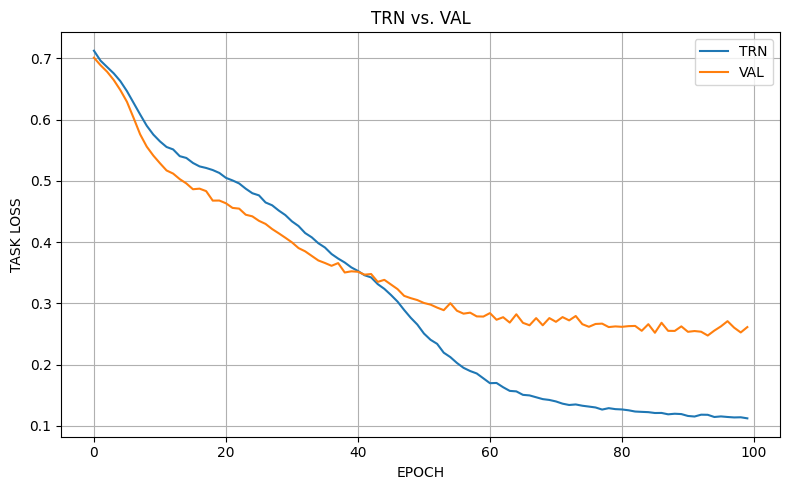

In [14]:
et_cetera.vis.plot_loss(history, 'TASK LOSS')

# Test

### TST Data

In [15]:
kwargs = dict(
    tst_loader=tst_loader,
)

result = loop.predict(**kwargs)

TST: 100%|██████████| 314/314 [00:01<00:00, 282.92it/s]


In [16]:
trues = result['true'][result['true'][DEFAULT_USER_COL]==LOW_USER]

preds = result['pred'][
    result['pred'][DEFAULT_USER_COL]==LOW_USER
    ].sort_values(
        by=DEFAULT_PREDICTION_COL,
        ascending=False
    ).head(20)

merged = pd.merge(
    preds,
    trues,
    on=[DEFAULT_USER_COL, DEFAULT_ITEM_COL],
    how='inner'
)

merged

,userId,itemId,prediction,label
0,133,963,0.890625,0.0
1,133,963,0.890625,0.0
2,133,963,0.890625,0.0
3,133,963,0.890625,0.0
4,133,594,0.879883,0.0
5,133,217,0.837402,1.0
6,133,898,0.783691,0.0
7,133,383,0.779785,0.0
8,133,144,0.761719,0.0
9,133,163,0.702148,1.0


In [17]:
trues = result['true'][result['true'][DEFAULT_USER_COL]==HIGH_USER]

preds = result['pred'][
    result['pred'][DEFAULT_USER_COL]==HIGH_USER
    ].sort_values(
        by=DEFAULT_PREDICTION_COL,
        ascending=False
    ).head(20)

merged = pd.merge(
    preds,
    trues,
    on=[DEFAULT_USER_COL, DEFAULT_ITEM_COL],
    how='inner'
)

merged

,userId,itemId,prediction,label
0,330,461,0.903809,0.0
1,330,461,0.903809,0.0
2,330,461,0.903809,0.0
3,330,461,0.903809,0.0
4,330,2224,0.902832,1.0
5,330,4070,0.901855,0.0
6,330,5901,0.901855,1.0
7,330,908,0.900391,0.0
8,330,3136,0.899902,0.0
9,330,899,0.899414,0.0


In [18]:
TOP_K = 10

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result['true'],
    rating_pred=result['pred'],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@10: 0.904918
PRECISION@10: 0.267869
RECALL@10: 0.381072
MAP@10: 0.229055
NDCG@10: 0.414883
AGGDIV@10: 0.120984
MEAN NOVELTY@10: 9.864052
MEAN SERENDIPITY@10: 0.232951
PERSONALIZATION@10: 0.958448


In [19]:
TOP_K = 20

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result['true'],
    rating_pred=result['pred'],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@20: 0.978689
PRECISION@20: 0.207213
RECALL@20: 0.530149
MAP@20: 0.266462
NDCG@20: 0.455720
AGGDIV@20: 0.129180
MEAN NOVELTY@20: 10.397560
MEAN SERENDIPITY@20: 0.178934
PERSONALIZATION@20: 0.959207


In [20]:
TOP_K = 50

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result['true'],
    rating_pred=result['pred'],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@50: 0.998361
PRECISION@50: 0.132197
RECALL@50: 0.698338
MAP@50: 0.297367
NDCG@50: 0.507079
AGGDIV@50: 0.120000
MEAN NOVELTY@50: 11.282484
MEAN SERENDIPITY@50: 0.104328
PERSONALIZATION@50: 0.960668


In [21]:
TOP_K = 100

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result['true'],
    rating_pred=result['pred'],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@100: 1.000000
PRECISION@100: 0.086967
RECALL@100: 0.794197
MAP@100: 0.311062
NDCG@100: 0.540977
AGGDIV@100: 0.108885
MEAN NOVELTY@100: 12.097154
MEAN SERENDIPITY@100: 0.063426
PERSONALIZATION@100: 0.959728


In [22]:
TOP_K = 10
QUARTER = 0.25

user_counts = data[DEFAULT_USER_COL].value_counts()
low_threshold = user_counts.quantile(QUARTER)
low_users = user_counts[user_counts<=low_threshold]

low_preds = result['pred'][result['pred'][DEFAULT_USER_COL].isin(low_users)]

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result['true'],
    rating_pred=low_preds,
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@10: 0.937500
PRECISION@10: 0.206250
RECALL@10: 0.344816
MAP@10: 0.195003
NDCG@10: 0.353060
AGGDIV@10: 0.712500
MEAN NOVELTY@10: 9.756340
MEAN SERENDIPITY@10: 0.181250
PERSONALIZATION@10: 0.955000


In [23]:
TOP_K = 20
QUARTER = 0.25

user_counts = data[DEFAULT_USER_COL].value_counts()
low_threshold = user_counts.quantile(QUARTER)
low_users = user_counts[user_counts<=low_threshold]

low_preds = result['pred'][result['pred'][DEFAULT_USER_COL].isin(low_users)]

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result['true'],
    rating_pred=low_preds,
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@20: 0.937500
PRECISION@20: 0.150000
RECALL@20: 0.408051
MAP@20: 0.210934
NDCG@20: 0.374361
AGGDIV@20: 0.734375
MEAN NOVELTY@20: 10.235119
MEAN SERENDIPITY@20: 0.121875
PERSONALIZATION@20: 0.952917


In [24]:
TOP_K = 50
QUARTER = 0.25

user_counts = data[DEFAULT_USER_COL].value_counts()
low_threshold = user_counts.quantile(QUARTER)
low_users = user_counts[user_counts<=low_threshold]

low_preds = result['pred'][result['pred'][DEFAULT_USER_COL].isin(low_users)]

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result['true'],
    rating_pred=low_preds,
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@50: 1.000000
PRECISION@50: 0.098750
RECALL@50: 0.575971
MAP@50: 0.233036
NDCG@50: 0.425287
AGGDIV@50: 0.755000
MEAN NOVELTY@50: 11.200294
MEAN SERENDIPITY@50: 0.073750
PERSONALIZATION@50: 0.956667


In [25]:
TOP_K = 100
QUARTER = 0.25

user_counts = data[DEFAULT_USER_COL].value_counts()
low_threshold = user_counts.quantile(QUARTER)
low_users = user_counts[user_counts<=low_threshold]

low_preds = result['pred'][result['pred'][DEFAULT_USER_COL].isin(low_users)]

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result['true'],
    rating_pred=low_preds,
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@100: 1.000000
PRECISION@100: 0.071250
RECALL@100: 0.744673
MAP@100: 0.248764
NDCG@100: 0.486427
AGGDIV@100: 0.753125
MEAN NOVELTY@100: 11.969475
MEAN SERENDIPITY@100: 0.051875
PERSONALIZATION@100: 0.956333


### Leave-One-Out Data

In [26]:
kwargs = dict(
    tst_loader=loo_loader,
)

result = loop.predict(**kwargs)

TST: 100%|██████████| 610/610 [00:00<00:00, 657.67it/s]


In [27]:
TOP_K = 10

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result['true'],
    rating_pred=result['pred'],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@10: 0.790164
PRECISION@10: 0.079016
RECALL@10: 0.790164
MAP@10: 0.464471
NDCG@10: 0.542280
AGGDIV@10: 0.385574
MEAN NOVELTY@10: 11.630378
MEAN SERENDIPITY@10: 0.072623
PERSONALIZATION@10: 0.994813
